In [1]:
import scgenome.plotting as pl
import anndata

/Users/zemp/PycharmProjects/victree/venv/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/zemp/PycharmProjects/victree/venv/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/zemp/PycharmProjects/victree/venv/lib/python3.10/si

In [10]:
file_path = "/Users/zemp/PycharmProjects/victree/datasets/simul_k5a7n300m2012e10-1000d10mt1-10-2500-50.h5ad"
ad = anndata.read_h5ad(file_path)

/Users/zemp/PycharmProjects/victree/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


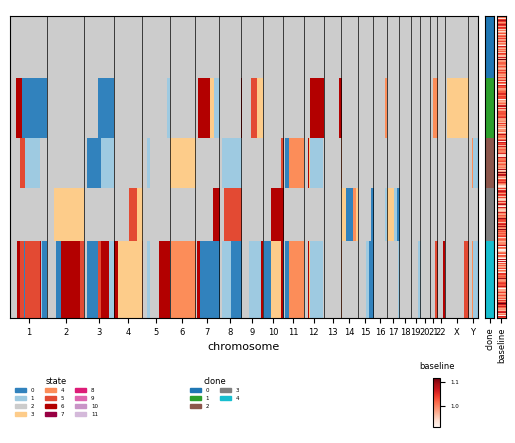

In [15]:
g = pl.plot_cell_cn_matrix_fig(ad, 'state', max_cn=6, cell_order_fields=['clone'], annotation_fields=['clone', 'baseline'])

In [16]:
ad.write_csvs("/Users/zemp/PycharmProjects/victree/datasets/corr_reads.csv")